In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Edge extraction

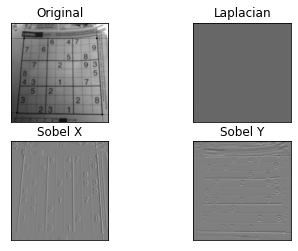

In [8]:
img = cv2.imread('sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

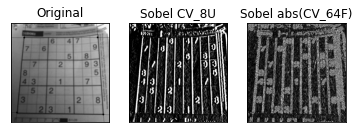

In [13]:
img = cv2.imread('sudoku.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

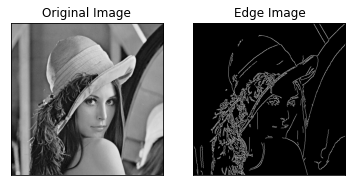

In [15]:
img = cv2.imread('Lenna.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Contours

In [28]:
im = cv2.imread('hand.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

(Text(0.5, 1.0, 'thresh'), ([], []), ([], []))

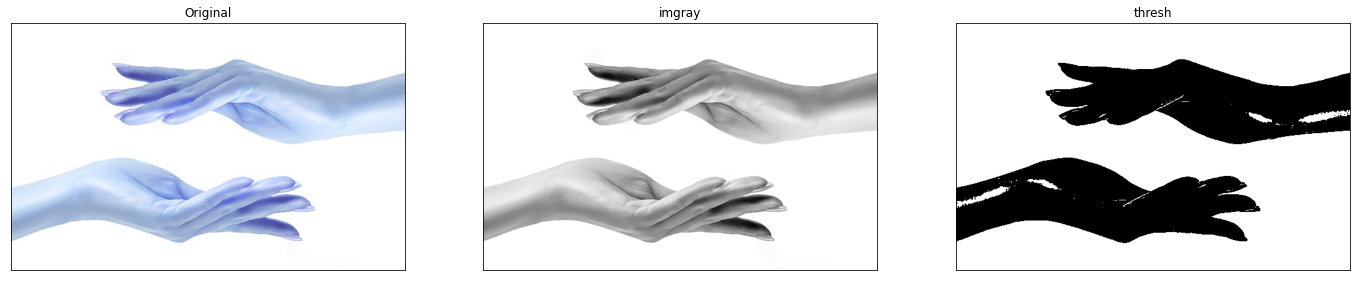

In [104]:
im = cv2.imread('hand.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,240,255,0)

plt.figure(figsize=(24,12))
plt.subplot(1,3,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('imgray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])


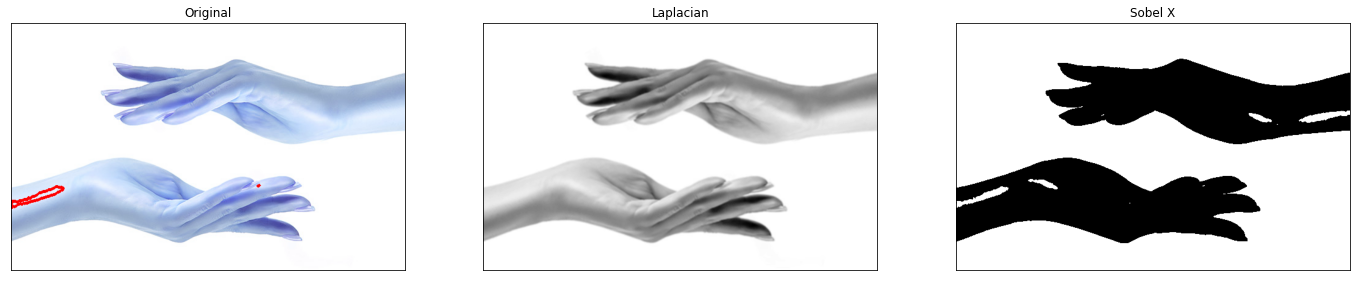

In [129]:
im = cv2.imread('hand.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,240,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, #cv2.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 5)
dilation = cv2.dilate(img,kernel,iterations = 5)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(im, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(im, contours, 3, (255,0,0), 3)

plt.figure(figsize=(24,12))
plt.subplot(1,3,1), plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.show()

In [103]:
print(len(contours))

73


In [117]:
size = []
for i in range(len(contours)):
    size.append((i, contours[i].shape[0]))

print(len(contours[i].shape))

3


In [34]:
img = cv2.imread('hand.jpg',0)
ret,thresh = cv2.threshold(img,240,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print(M)

{'m00': 0.0, 'm10': 0.0, 'm01': 0.0, 'm20': 0.0, 'm11': 0.0, 'm02': 0.0, 'm30': 0.0, 'm21': 0.0, 'm12': 0.0, 'm03': 0.0, 'mu20': 0.0, 'mu11': 0.0, 'mu02': 0.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.0, 'nu11': 0.0, 'nu02': 0.0, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [36]:
area = cv2.contourArea(cnt)

In [37]:
perimeter = cv2.arcLength(cnt,True)

In [38]:
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

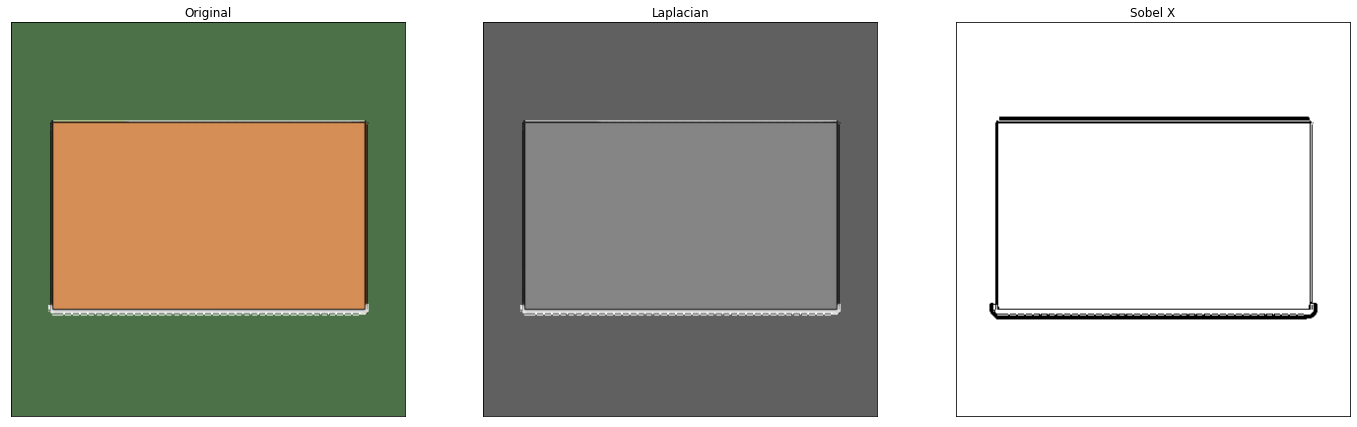

In [63]:
im = cv2.imread('rectangle.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [72]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 2, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 3, (255,0,0), 3)

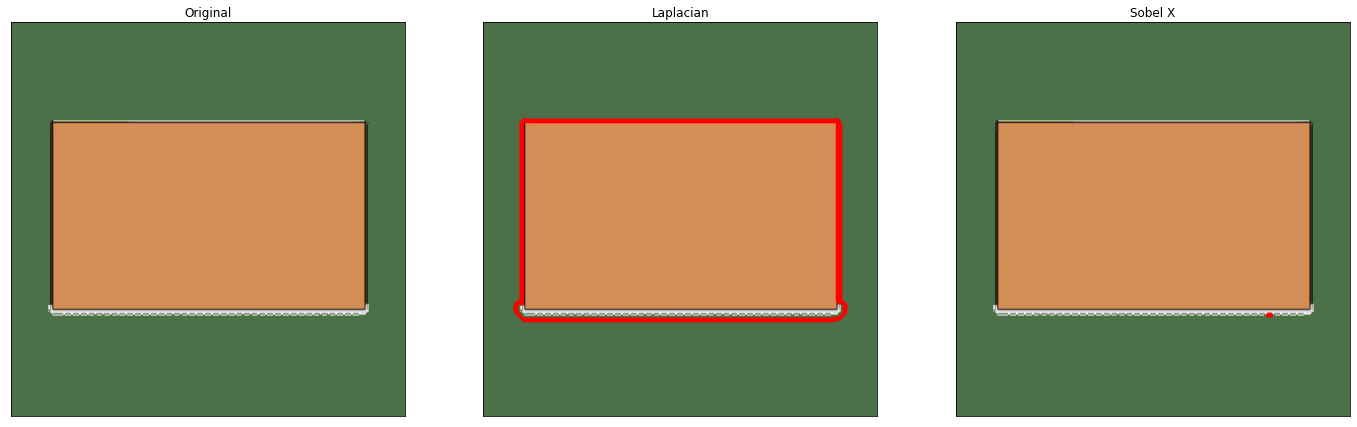

In [73]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [74]:
print(contours)

(array([[[  0,   0]],

       [[  0, 399]],

       [[399, 399]],

       [[399,   0]]], dtype=int32), array([[[361, 102]],

       [[362, 101]],

       [[363, 102]],

       [[362, 103]]], dtype=int32), array([[[ 40, 100]],

       [[ 41,  99]],

       [[ 42,  99]],

       [[ 43, 100]],

       [[358, 100]],

       [[359,  99]],

       [[361, 101]],

       [[361, 102]],

       [[360, 103]],

       [[360, 283]],

       [[360, 104]],

       [[361, 103]],

       [[362, 104]],

       [[362, 284]],

       [[365, 284]],

       [[367, 286]],

       [[367, 294]],

       [[366, 295]],

       [[366, 296]],

       [[362, 300]],

       [[361, 300]],

       [[360, 301]],

       [[356, 301]],

       [[355, 302]],

       [[ 41, 302]],

       [[ 34, 295]],

       [[ 34, 294]],

       [[ 33, 293]],

       [[ 33, 286]],

       [[ 35, 284]],

       [[ 37, 284]],

       [[ 38, 285]],

       [[ 39, 285]],

       [[ 39, 102]],

       [[ 40, 101]]], dtype=int32), array([[[31

In [75]:
print(len(contours))

36


In [76]:
cnt = contours[2]
M = cv2.moments(cnt)
print(M)

{'m00': 65370.5, 'm10': 13103608.666666666, 'm01': 13151215.5, 'm20': 3197256720.25, 'm11': 2636022409.7916665, 'm02': 2868596609.75, 'm30': 869656461189.3, 'm21': 643374720610.4667, 'm12': 574933200511.9333, 'm03': 666738720395.65, 'mu20': 570619933.1802707, 'mu11': -157233.97732686996, 'mu02': 222839439.04700327, 'mu30': -1281563.3732910156, 'mu21': 214710027.48236084, 'mu12': -17759949.608444214, 'mu03': -26122568.747680664, 'nu20': 0.13353137622695896, 'nu11': -3.6794489924456324e-05, 'nu02': 0.052146893656077956, 'nu30': -1.172966395113851e-06, 'nu21': 0.00019651595245270126, 'nu12': -1.6255008924080726e-05, 'nu03': -2.3908997349382615e-05}


In [85]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [84]:
print(area, perimeter)

65370.5 1423.0121929645538


In [86]:
print(approx)

[[[ 40 100]]

 [[359  99]]

 [[366 296]]

 [[ 41 302]]]


In [79]:
img0 = cv2.rectangle(img0, (cx-2,cy-2),(cx+2,cy+2),(0,0,255),2)

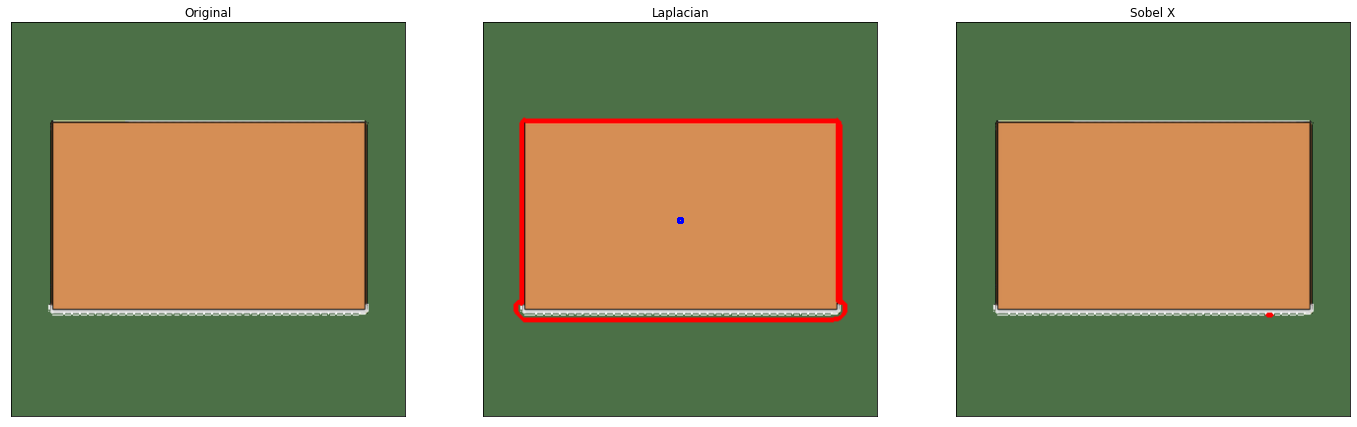

In [80]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [88]:
img1 = cv2.drawContours(img1, approx, 3, (255,0,0), 3)

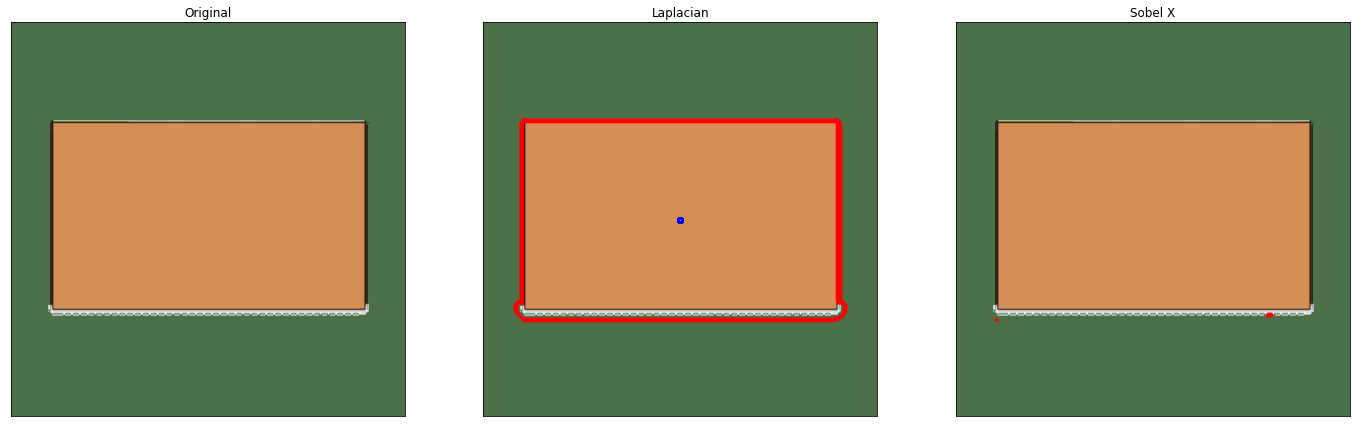

In [89]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()